<a href="https://colab.research.google.com/github/santoshdhalwalkar/Telecommunication/blob/main/Telecommunication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import drive from google
from google.colab import drive

In [3]:
# mount the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
 #read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/telcom_data.csv")
df


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [6]:
df.shape

(150001, 55)

In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
from datetime import datetime

###Unix epoch, using pandas' pd.to_datetime

#### The function has a clear purpose: one for conversion and one for applying that conversion to a DataFrame column.

In [10]:
# Function to convert date string to milliseconds since the Unix epoch using pandas
def to_milliseconds_using_pandas(date_str):
    # Convert date string to datetime, coerce errors to NaT
    timestamp = pd.to_datetime(date_str, format="%m/%d/%Y %H:%M", errors='coerce')
    # Return None if the date is NaT
    if pd.isnull(timestamp):
        return None
    # Convert to milliseconds since Unix epoch
    return int(timestamp.timestamp() * 1000)

# Function to apply the conversion function to a specific column
def convert_column_to_milliseconds(df, column_name):
    df[column_name] = df[column_name].apply(to_milliseconds_using_pandas)

# Convert 'Start' and 'End' columns
convert_column_to_milliseconds(df, 'Start')
convert_column_to_milliseconds(df, 'End')

# Display the first few rows and the updated data types

print(df.dtypes)

Bearer Id                                   float64
Start                                       float64
Start ms                                    float64
End                                         float64
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [11]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
# Function to convert Last Location Name to int if possible, otherwise NaN
def convert_to_int(value):
    try:
        return int(float(value))
    except ValueError:
        return None

# Apply the function to the "Last Location Name" column
df['Last Location Name'] = df['Last Location Name'].apply(convert_to_int)

In [13]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,NaN,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,NaN,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,NaN,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,NaN,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [14]:
# Replace NaN values with a specific integer, e.g., 0
df['Last Location Name'].fillna(0, inplace=True)

In [15]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,0.000000e+00,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,1.554832e+12,1.0,1.556193e+12,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,0.000000e+00,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,1.554856e+12,486.0,1.556178e+12,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,0.000000e+00,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,1.555100e+12,565.0,1.556189e+12,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,0.000000e+00,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [16]:
df.isnull().sum()


,0
Bearer Id,991
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,0


#### Fill the null values for the time component data, Id columns

In [17]:
# Ensure the data is sorted by a time-related column if applicable
# For example, 'Start' or another datetime column
df = df.sort_values(by='Start')  # Replace 'Start' with your datetime column name if different


# Apply forward fill and backward fill to fill missing values
df['Bearer Id'] = df['Bearer Id'].ffill().bfill()
df['Start'] = df['Start'].ffill().bfill()
df['End'] = df['End'].ffill().bfill()
df['IMSI'] = df['IMSI'].ffill().bfill()
df['MSISDN/Number'] = df['MSISDN/Number'].ffill().bfill()
df['IMEI'] = df['IMEI'].ffill().bfill()
a=df.isnull().sum()
print(a)

Bearer Id                                        0
Start                                            0
Start ms                                         1
End                                              0
End ms                                           1
Dur. (ms)                                        1
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                               0
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Fill the null values for numerical columns




In [18]:

# Select numerical columnsnumerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define a function to fill missing values with mean or median
def fill_missing_values(data, columns, strategy='mean'):
    if strategy == 'mean':
        for col in columns:
            df[col].fillna(data[col].mean(), inplace=True)
    elif strategy == 'median':
        for col in columns:
            df[col].fillna(data[col].median(), inplace=True)

            # Example: Filling missing values with median
fill_missing_values(df, numerical_cols, strategy='median')

# Verify that there are no more missing values in the numerical columns
missing_values = df[numerical_cols].isnull().sum()
print(missing_values)


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

#### Fill the null values for  categorical columns

In [19]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Calculate the mode for the column
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that there are no more missing values in the categorical columns
df.isnull().sum()


,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


In [20]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1.554379e+12,770.0,1.556203e+12,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.164570e+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
25000,1.311450e+19,1.554779e+12,868.0,1.556254e+12,267.0,1474663.0,2.082020e+14,3.360750e+10,3.592370e+13,0.000000e+00,...,20629532.0,9512221.00,22054947.00,419804.00,88042442.0,4.368837e+06,329470719.0,1.537045e+07,31402931.0,145604005.0
125000,1.304240e+19,1.554803e+12,752.0,1.556663e+12,194.0,1859336.0,2.082010e+14,3.362578e+10,3.528140e+13,0.000000e+00,...,10163169.0,6427023.00,19192742.00,21799809.00,236781692.0,1.839956e+06,273131802.0,4.844901e+06,35967601.0,270532405.0
125001,1.311450e+19,1.554803e+12,547.0,1.556663e+12,539.0,1859327.0,2.082010e+14,3.362578e+10,3.528140e+13,0.000000e+00,...,11795585.0,3798756.00,5359834.00,7098414.00,828368274.0,1.633332e+07,365492157.0,3.041753e+06,32832250.0,858011364.0
1,1.311450e+19,1.554815e+12,235.0,1.556180e+12,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,0.000000e+00,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149939,7.277830e+18,1.556523e+12,304.0,1.556584e+12,341.0,61610.0,2.082020e+14,3.366096e+10,3.594850e+13,0.000000e+00,...,8495224.0,5306489.00,3556457.00,17636352.00,269477920.0,4.985484e+06,131248361.0,9.159086e+06,39443064.0,294679476.0
149938,7.349880e+18,1.556523e+12,405.0,1.556606e+12,360.0,82745.0,2.082020e+14,3.361957e+10,3.556210e+13,0.000000e+00,...,22613630.0,9523815.00,18752564.00,15464894.00,781632345.0,4.811422e+06,47444070.0,1.082820e+07,44038913.0,829833410.0
149946,1.304240e+19,1.556523e+12,642.0,1.556611e+12,780.0,88151.0,2.082010e+14,3.366098e+10,3.536980e+13,0.000000e+00,...,13440534.0,14022107.00,6354225.00,11006739.00,586299601.0,1.166482e+07,475373756.0,3.378200e+05,41034976.0,619739938.0
149999,1.311450e+19,1.556523e+12,696.0,1.556621e+12,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,0.000000e+00,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [21]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


#### Rename the columns name to avoid invalid syntax

In [22]:
# Renaming columns

df = df.rename(columns={
    'Bearer Id': 'BearerId',    'Start ms': 'StartMS',    'End ms': 'EndMS',    'MSISDN/Number': 'MSISDNNumber',
    'Last Location Name': 'LastLocationName',   'AI Lens': 'AILens',    'Battery_': 'Battery',    'Battery Type': 'BatteryType',
    'Cell Id': 'CellId',  'Handset Manufacturer': 'HandsetManufacturer',  'Handset Type': 'HandsetType',  'Handset Sub-Type': 'HandsetSubType',
    'Last Location Longitude': 'LastLocationLongitude',   'Last Location Latitude': 'LastLocationLatitude',     'Last Location Time': 'LastLocationTime',
    'Avg RTT DL (ms)': 'AvgRTT_DL',     'Avg RTT UL (ms)': 'AvgRTT_UL',     'Avg Bearer TP DL (kbps)': 'AvgBearerTP_DL',     'Avg Bearer TP UL (kbps)': 'AvgBearerTP_UL',
    'HTTP DL (Bytes)': 'HTTP_DL', 'HTTP UL (Bytes)': 'HTTP_UL',     'Activity Duration DL (ms)': 'ActivityDuration_DL',
    'Activity Duration UL (ms)': 'ActivityDuration_UL', 'Total DL (Bytes)': 'Total_DL',      'Total UL (Bytes)': 'Total_UL',
    'Total DL (Bytes)': 'Total_DL',     'Total UL (Bytes)': 'Total_UL',     'HTTP DL (Bytes)': 'HTTP_DL',     'HTTP UL (Bytes)': 'HTTP_UL',
    'Activity Duration DL (ms)': 'ActivityDuration_DL',   'Activity Duration UL (ms)': 'ActivityDuration_UL', 'Dur. (ms)': 'Durms',
    'TCP DL Retrans. Vol (Bytes)': 'TCPDLRetransVol_Bytes',     'TCP UL Retrans. Vol (Bytes)': 'TCPULRetransVol_Bytes',
    'DL TP < 50 Kbps (%)': 'DLTP_50Kbps',     '50 Kbps < DL TP < 250 Kbps (%)': 'DLTP_250Kbps',     '250 Kbps < DL TP < 1 Mbps (%)': 'DLTP_1Mbps',
    'DL TP > 1 Mbps (%)': 'DLTP_1p5Mbps',    'UL TP < 10 Kbps (%)': 'ULTP_10Kbps',      '10 Kbps < UL TP < 50 Kbps (%)': 'ULTP_50Kbps',
    '50 Kbps < UL TP < 300 Kbps (%)': 'ULTP_300Kbps',       'UL TP > 300 Kbps (%)': 'ULTP_300p5Mbps',     'Dur. (ms).1': 'Durms_1',
    'Nb of sec with Vol UL < 1250B': 'Seconds_DL_Volume_Over_125KB',         'Nb of sec with Vol DL < 1250B': 'Seconds_UL_Volume_Over_125KB',
    'Nb of sec with 1250B < Vol UL < 6250B': 'Seconds_DL_Volume_Over_625KB',      'Nb of sec with 31250B < Vol DL < 125000B': 'Seconds_UL_Volume_Over_125KB',
    'Nb of sec with 37500B < Vol UL': 'Seconds_DL_Volume_Over_375KB',        'Nb of sec with 6250B < Vol DL < 31250B': 'Seconds_UL_Volume_Over_625KB',
    'Nb of sec with 6250B < Vol UL < 37500B': 'Seconds_DL_Volume_Over_375KB',     'Nb of sec with Vol DL < 6250B': 'Seconds_UL_Volume_Over_625KB',
    'Social Media DL (Bytes)': 'SocialMediaDL_Bytes',        'Social Media UL (Bytes)': 'SocialMediaUL_Bytes',
    'Google DL (Bytes)': 'GoogleDL_Bytes',      'Google UL (Bytes)': 'GoogleUL_Bytes',      'Email DL (Bytes)': 'EmailDL_Bytes',      'Email UL (Bytes)': 'EmailUL_Bytes',
    'Youtube DL (Bytes)': 'YoutubeDL_Bytes',    'Youtube UL (Bytes)': 'YoutubeUL_Bytes',    'Netflix DL (Bytes)': 'NetflixDL_Bytes',  'Netflix UL (Bytes)': 'NetflixUL_Bytes',
    'Gaming DL (Bytes)': 'GamingDL_Bytes',    'Gaming UL (Bytes)': 'GamingUL_Bytes',    'Other DL (Bytes)': 'OtherDL_Bytes',    'Other UL (Bytes)': 'OtherUL_Bytes',

     })

In [23]:
df.columns

Index(['BearerId', 'Start', 'StartMS', 'End', 'EndMS', 'Durms', 'IMSI',
       'MSISDNNumber', 'IMEI', 'LastLocationName', 'AvgRTT_DL', 'AvgRTT_UL',
       'AvgBearerTP_DL', 'AvgBearerTP_UL', 'TCPDLRetransVol_Bytes',
       'TCPULRetransVol_Bytes', 'DLTP_50Kbps', 'DLTP_250Kbps', 'DLTP_1Mbps',
       'DLTP_1p5Mbps', 'ULTP_10Kbps', 'ULTP_50Kbps', 'ULTP_300Kbps',
       'ULTP_300p5Mbps', 'HTTP_DL', 'HTTP_UL', 'ActivityDuration_DL',
       'ActivityDuration_UL', 'Durms_1', 'HandsetManufacturer', 'HandsetType',
       'Nb of sec with 125000B < Vol DL', 'Seconds_DL_Volume_Over_625KB',
       'Seconds_UL_Volume_Over_125KB', 'Seconds_DL_Volume_Over_375KB',
       'Seconds_UL_Volume_Over_625KB', 'Seconds_DL_Volume_Over_375KB',
       'Seconds_UL_Volume_Over_625KB', 'Seconds_DL_Volume_Over_125KB',
       'SocialMediaDL_Bytes', 'SocialMediaUL_Bytes', 'GoogleDL_Bytes',
       'GoogleUL_Bytes', 'EmailDL_Bytes', 'EmailUL_Bytes', 'YoutubeDL_Bytes',
       'YoutubeUL_Bytes', 'NetflixDL_Bytes', 'Netfli

####Calculates the duration based on the Start, StartMS, End, and EndMS columns

In [24]:
# Convert Durms (milliseconds) to duration in seconds
df['Duration_Seconds'] = df['Durms'] / 1000.0

In [25]:
# Combine Start and StartMS to get the precise start time in milliseconds
df['Start_Total_MS'] = (df['Start'] * 1000) + df['StartMS']

# Combine End and EndMS to get the precise end time in milliseconds
df['End_Total_MS'] = (df['End'] * 1000) + df['EndMS']

# Calculate the duration in milliseconds
df['Calculated_Durms'] = df['End_Total_MS'] - df['Start_Total_MS']

# Convert the duration to seconds
df['Calculated_Duration_Seconds'] = df['Calculated_Durms'] / 1000.0

# Display the first few rows to confirm the new feature
df[['Start', 'StartMS', 'End', 'EndMS', 'Calculated_Duration_Seconds']].head()

,Start,StartMS,End,EndMS,Calculated_Duration_Seconds
0,1.554379e+12,770.0,1.556203e+12,662.0,1.823640e+09
25000,1.554779e+12,868.0,1.556254e+12,267.0,1.474680e+09
125000,1.554803e+12,752.0,1.556663e+12,194.0,1.859340e+09
125001,1.554803e+12,547.0,1.556663e+12,539.0,1.859340e+09
1,1.554815e+12,235.0,1.556180e+12,606.0,1.365060e+09


#### Top 10 handsets and top 3 handset manufacturers

In [26]:
def get_top_handsets(data, top_n=10):
    return data['HandsetType'].value_counts().head(top_n)

def get_top_manufacturers(data, top_n=3):
    return data['HandsetManufacturer'].value_counts().head(top_n)

 # Example usage:
top_handsets = get_top_handsets(df)
top_manufacturers = get_top_manufacturers(df)

In [27]:
print(top_handsets)

HandsetType
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


####Replace 'undefined'data with 'Unknown' label

In [28]:
# Replace 'undefined' with 'Unknown'
df['HandsetType'] = df['HandsetType'].replace('undefined', 'Unknown')

In [29]:
print(top_handsets)

HandsetType
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


####Univariate visualization for top 10 handsets

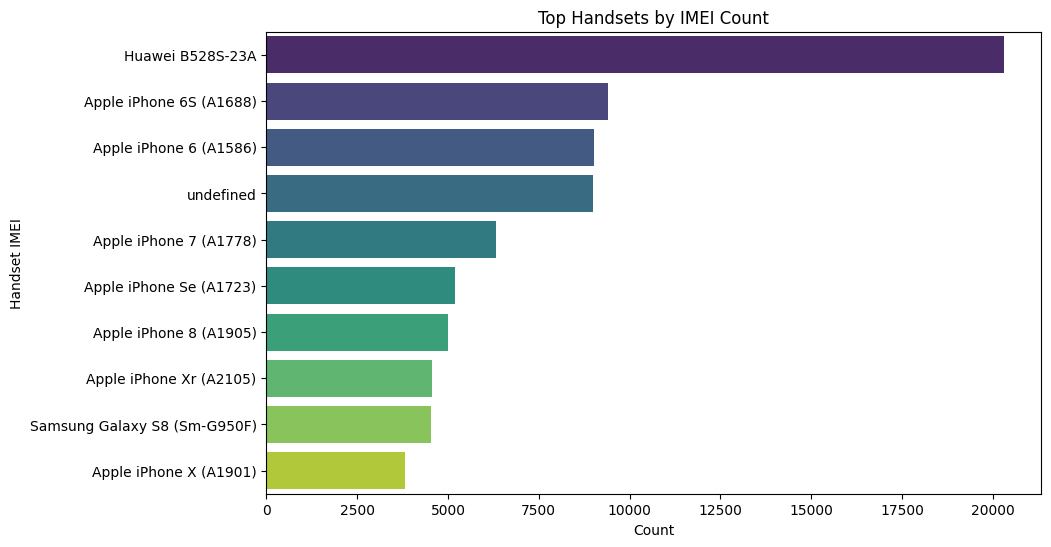

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_handsets.values, y=top_handsets.index, palette="viridis")
plt.title("Top Handsets by IMEI Count")
plt.xlabel("Count")
plt.ylabel("Handset IMEI")
plt.show()

In [31]:
print(top_manufacturers)

HandsetManufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


####Univariate visualization for top 3 manufacturers

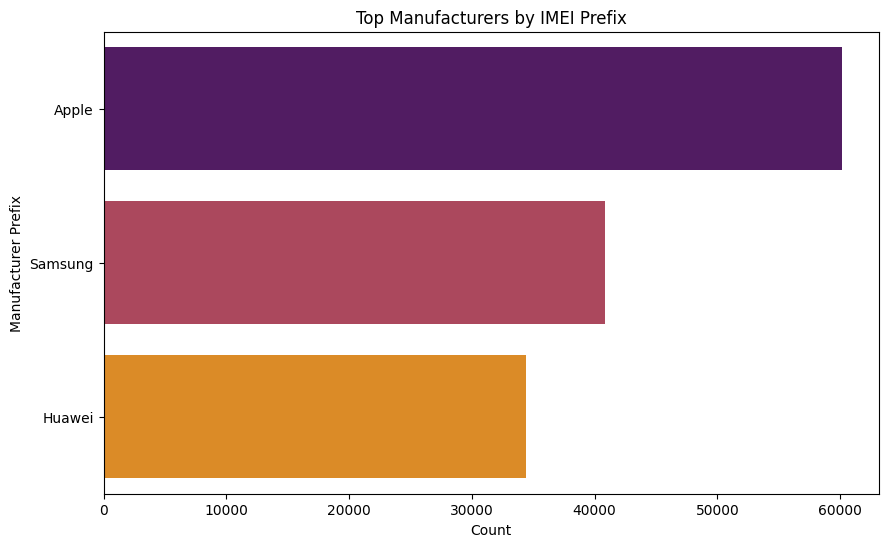

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette="inferno")
plt.title("Top Manufacturers by IMEI Prefix")
plt.xlabel("Count")
plt.ylabel("Manufacturer Prefix")
plt.show()

####For each top manufacturer, find the top 5 handsets

In [33]:
top_handsets_per_manufacturer = {}

# Iterate and find top 5 handsets per top 3 manufacturers
for manufacturer in top_manufacturers.index:
    # Filter data for the manufacturer using a Boolean mask
    manufacturer_data = df[df['HandsetManufacturer'] == manufacturer]

    # Count occurrences of each handset type
    handset_counts = manufacturer_data['HandsetType'].value_counts().head(5)

    # Store the results in the dictionary
    top_handsets_per_manufacturer[manufacturer] = handset_counts

# Convert the top_handsets_per_manufacturer dictionary into a DataFrame
top_handsets_df = pd.DataFrame([
    {'Manufacturer': manufacturer, 'Handset': handset, 'Count': count}
    for manufacturer, handsets in top_handsets_per_manufacturer.items()
    for handset, count in handsets.items()
])

# Display the DataFrame
print(top_handsets_df)

   Manufacturer                         Handset  Count
0         Apple         Apple iPhone 6S (A1688)   9419
1         Apple          Apple iPhone 6 (A1586)   9023
2         Apple          Apple iPhone 7 (A1778)   6326
3         Apple         Apple iPhone Se (A1723)   5187
4         Apple          Apple iPhone 8 (A1905)   4993
5       Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
6       Samsung      Samsung Galaxy A5 Sm-A520F   3724
7       Samsung     Samsung Galaxy J5 (Sm-J530)   3696
8       Samsung     Samsung Galaxy J3 (Sm-J330)   3484
9       Samsung    Samsung Galaxy S7 (Sm-G930X)   3199
10       Huawei                Huawei B528S-23A  19752
11       Huawei                    Huawei E5180   2079
12       Huawei  Huawei P20 Lite Huawei Nova 3E   2021
13       Huawei                      Huawei P20   1480
14       Huawei                  Huawei Y6 2018    997


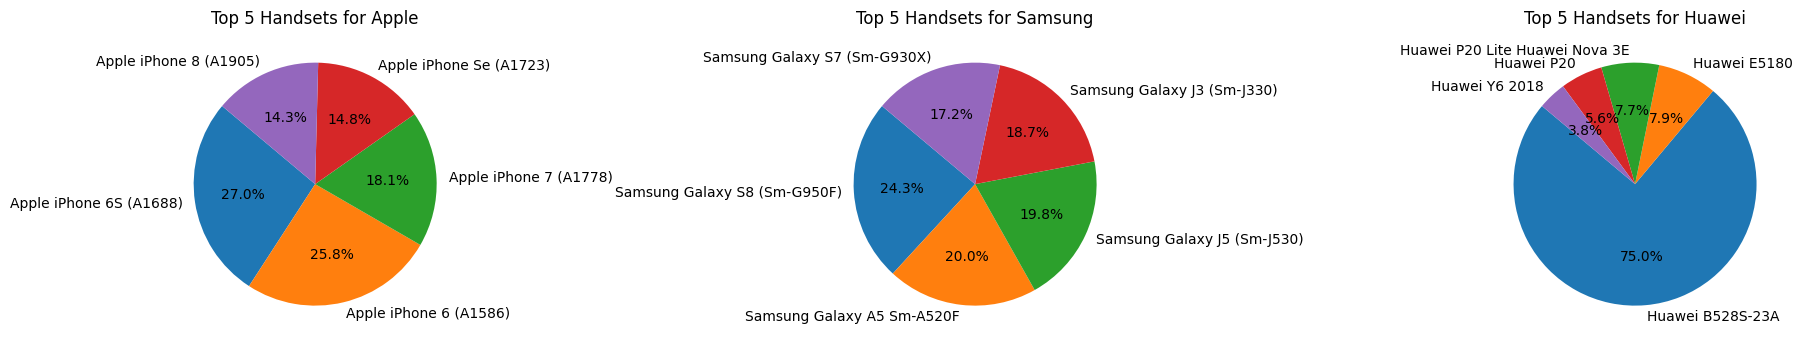

In [34]:
# Get unique manufacturers and handsets
manufacturers = top_handsets_df['Manufacturer'].unique()
handsets = top_handsets_df['Handset']

# Set up a subplot for each manufacturer
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create a pie chart for each manufacturer
x=[25, 30,45,10]
explode=(0,0.1,0.1,0)

# Plot a pie chart for each manufacturer
for i, manufacturer in enumerate(manufacturers):
    manufacturer_data = top_handsets_df[top_handsets_df['Manufacturer'] == manufacturer]
    axs[i].pie(manufacturer_data['Count'], labels=manufacturer_data['Handset'], autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Top 5 Handsets for {manufacturer}')

plt.tight_layout()
plt.show()

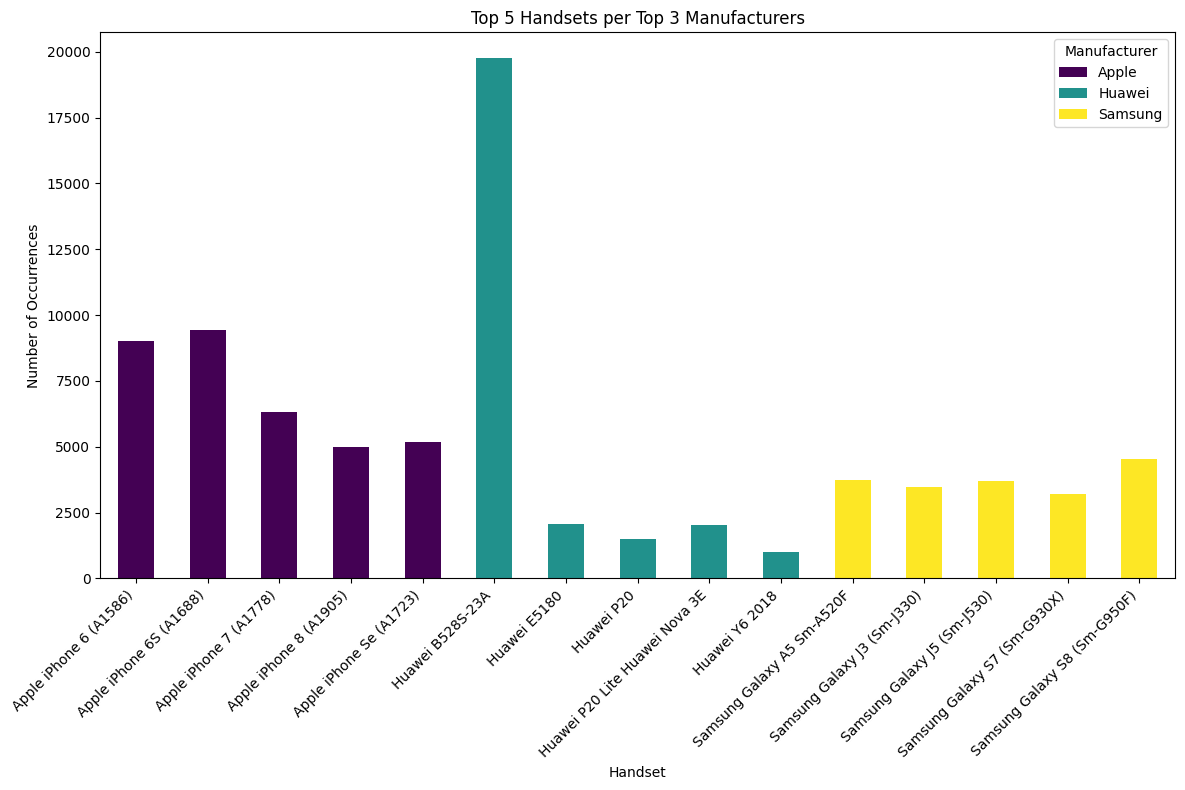

In [35]:
# Pivot the DataFrame for easier plotting
pivot_df = top_handsets_df.pivot(index='Handset', columns='Manufacturer', values='Count')

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Handset')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Manufacturer')

plt.tight_layout()
plt.show()

###Recommendations to Marketing Teams

1. Apple devices dominate the market. Create special promotions for Apple users, such as discounts on accessories or services.
2. Create promotions and offers for Samsung and Huawei users to boost their engagement and loyalty.
3.  Sell popular handsets with accessories like cases and screen protectors to increase sales.
4.  Send personalized offers based on handset usage For example, promote the latest models and features to younger users, while others might prioritize budget-friendly options
5.  Ask for feedback from top handset users to understand their preferences and improve your marketing strategies.








In [36]:
# Select relevant columns for analysis
columns_to_analyze = [
    'Durms', 'AvgRTT_DL', 'AvgRTT_UL', 'AvgBearerTP_DL', 'AvgBearerTP_UL',
    'TCPDLRetransVol_Bytes', 'TCPULRetransVol_Bytes', 'Total_UL', 'Total_DL'
]

# Compute descriptive statistics
metrics = df[columns_to_analyze].describe().T
metrics

,count,mean,std,min,25%,50%,75%,max
Durms,150001.0,1.046084e+05,8.103736e+04,7142.0,57442.0,86399.0,132430.0,1.859336e+06
AvgRTT_DL,150001.0,9.777445e+01,5.599094e+02,0.0,35.0,45.0,62.0,9.692300e+04
AvgRTT_UL,150001.0,1.531503e+01,7.668800e+01,0.0,3.0,5.0,11.0,7.120000e+03
AvgBearerTP_DL,150001.0,1.329996e+04,2.397182e+04,0.0,43.0,63.0,19710.0,3.781600e+05
AvgBearerTP_UL,150001.0,1.770417e+03,4.625342e+03,0.0,47.0,63.0,1120.0,5.861300e+04
TCPDLRetransVol_Bytes,150001.0,8.915464e+06,1.176582e+08,2.0,568730.0,568730.0,568730.0,4.294426e+09
TCPULRetransVol_Bytes,150001.0,2.836918e+05,1.578013e+07,1.0,20949.5,20949.5,20949.5,2.908226e+09
Total_UL,150001.0,4.112121e+07,1.127635e+07,2866892.0,33222029.0,41143312.0,49034238.0,7.833131e+07
Total_DL,150001.0,4.546434e+08,2.441421e+08,7114041.0,243107173.0,455841077.5,665705138.0,9.029696e+08


####Use IQR technique to find and rempove outliers

In [37]:


def iqr_technique(DFcol):
    Q1 = np.percentile(DFcol, 25)
    Q3 = np.percentile(DFcol, 75)

    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [38]:
lower_range, upper_range = iqr_technique(df['Durms'])
df = df [(df.Durms > lower_range) & (df.Durms < upper_range) ]

df.shape

(142817, 60)

In [39]:
lower_range, upper_range = iqr_technique(df['AvgRTT_DL'])
df = df [(df.AvgRTT_DL > lower_range) & (df.AvgRTT_DL < upper_range) ]

df.shape

(125659, 60)

In [40]:
lower_range, upper_range = iqr_technique(df['AvgRTT_UL'])
df = df [(df.AvgRTT_UL > lower_range) & (df.AvgRTT_UL < upper_range) ]

df.shape

(105670, 60)

In [41]:
lower_range, upper_range = iqr_technique(df['AvgBearerTP_DL'])
df = df [(df.AvgBearerTP_DL > lower_range) & (df.AvgBearerTP_DL < upper_range) ]

df.shape

(82094, 60)

In [42]:
lower_range, upper_range = iqr_technique(df['AvgBearerTP_UL'])
df = df [(df.AvgBearerTP_UL > lower_range) & (df.AvgBearerTP_UL < upper_range) ]

df.shape

(65689, 60)

In [43]:
lower_range, upper_range = iqr_technique(df['Total_UL'])
df = df [(df.Total_UL > lower_range) & (df.Total_UL < upper_range) ]

df.shape

(65571, 60)

In [44]:
lower_range, upper_range = iqr_technique(df['Total_DL'])
df = df [(df.Total_DL > lower_range) & (df.Total_DL < upper_range) ]

df.shape

(65571, 60)

####The mean is significantly higher than the median, it suggests a right-skewed distribution

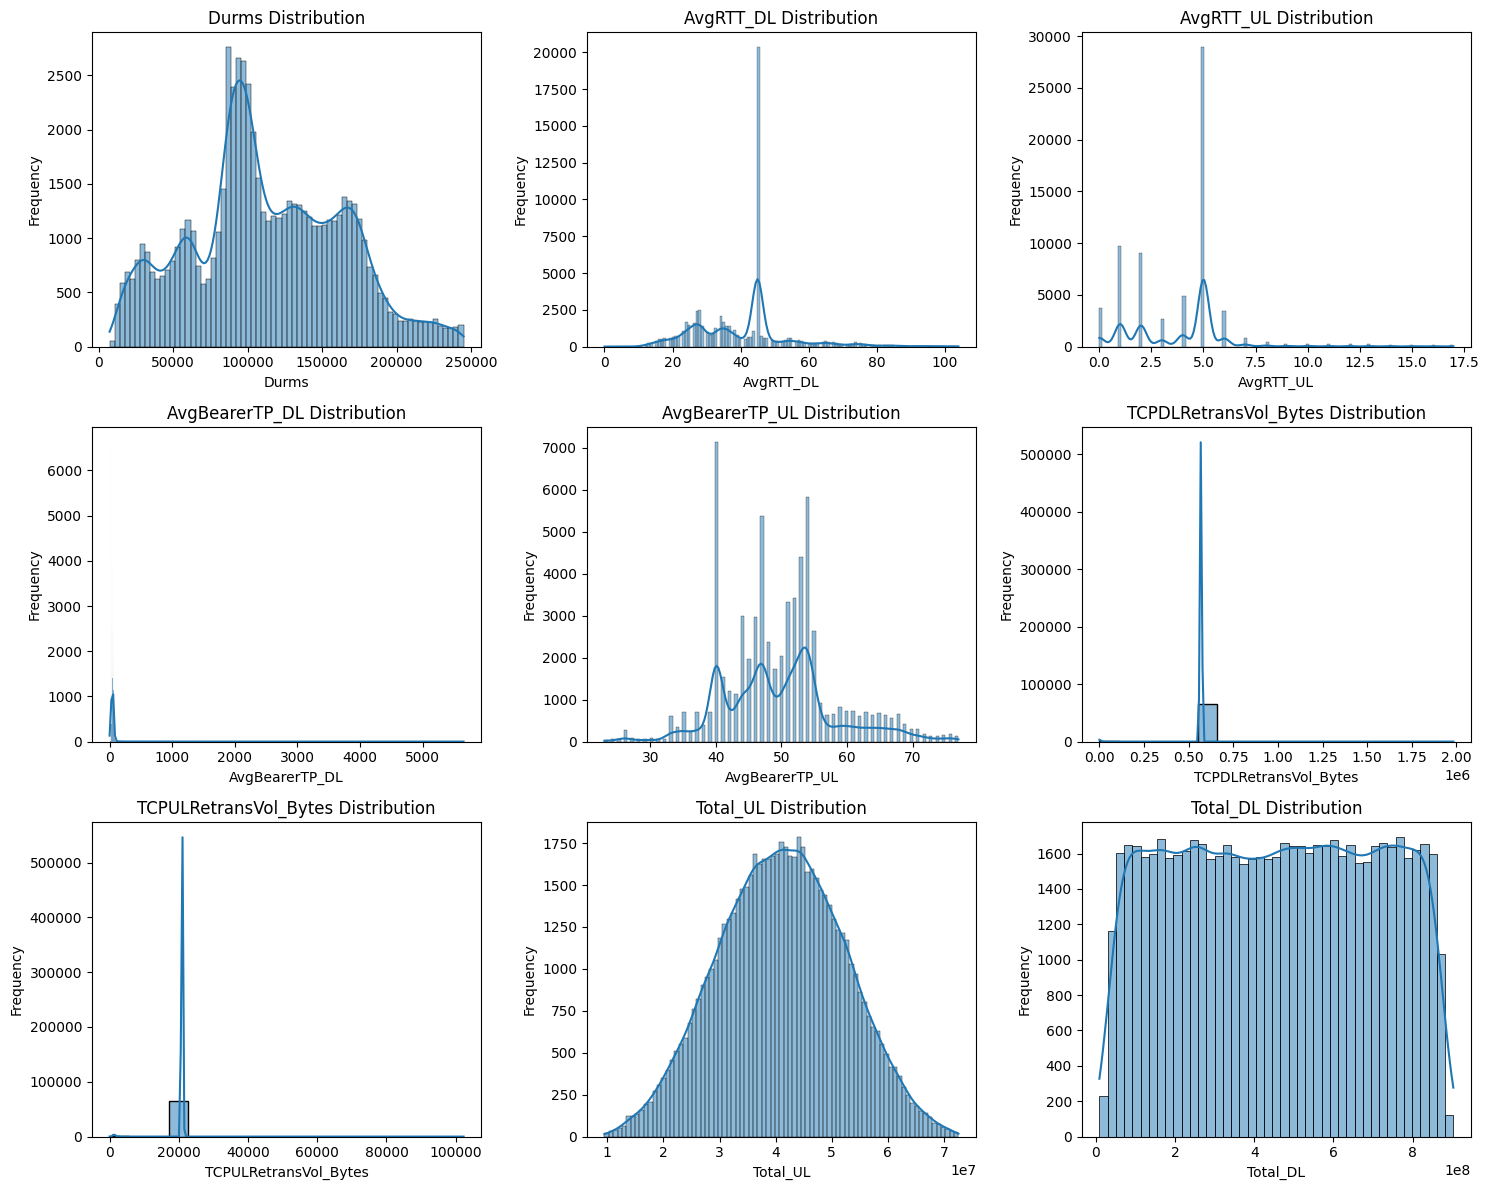

In [45]:
# Plot histograms and line plots to visualize skewness
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
aggregated_data = df.groupby('IMSI').agg(
    num_xDR_sessions=('BearerId', 'count'),  # Number of xDR sessions
    total_session_duration=('Calculated_Duration_Seconds', 'sum'),  # Total session duration in seconds
    total_DL_data=('Total_DL', 'sum'),  # Total DL data in bytes
    total_UL_data=('Total_UL', 'sum'),  # Total UL data in bytes
    total_Youtube_DL=('YoutubeDL_Bytes', 'sum'),  # Total Youtube DL data
    total_Youtube_UL=('YoutubeUL_Bytes', 'sum'),  # Total Youtube UL data
    total_Netflix_DL=('NetflixDL_Bytes', 'sum'),  # Total Netflix DL data
    total_Netflix_UL=('NetflixUL_Bytes', 'sum'),  # Total Netflix UL data
    total_Gaming_DL=('GamingDL_Bytes', 'sum'),  # Total Gaming DL data
    total_Gaming_UL=('GamingUL_Bytes', 'sum'),  # Total Gaming UL data
    total_Other_DL=('OtherDL_Bytes', 'sum'),  # Total Other DL data
    total_Other_UL=('OtherUL_Bytes', 'sum')  # Total Other UL data
).reset_index()

# Display the aggregated data
aggregated_data.head()

,IMSI,num_xDR_sessions,total_session_duration,total_DL_data,total_UL_data,total_Youtube_DL,total_Youtube_UL,total_Netflix_DL,total_Netflix_UL,total_Gaming_DL,total_Gaming_UL,total_Other_DL,total_Other_UL
0,2.082000e+14,5032,5.579138e+11,2.248631e+12,2.074997e+11,5.876756e+10,5.469206e+10,5.755445e+10,5.563607e+10,2.085376e+12,4.246932e+10,2.111719e+12,4.189249e+10
1,2.082010e+14,22854,2.576409e+12,1.037266e+13,9.403568e+11,2.651965e+11,2.513023e+11,2.658012e+11,2.517169e+11,9.628015e+12,1.900044e+11,9.584761e+12,1.890800e+11
2,2.082020e+14,36180,4.060406e+12,1.650488e+13,1.481964e+12,4.191664e+11,3.992136e+11,4.200558e+11,3.952286e+11,1.532765e+13,2.972941e+11,1.523971e+13,2.975930e+11
3,2.082100e+14,1505,1.768735e+11,7.038620e+11,6.154395e+10,1.764039e+10,1.672397e+10,1.780953e+10,1.612983e+10,6.543931e+11,1.248298e+10,6.253532e+11,1.238650e+10



1.   High Data Consumption: Users with long session durations and high data usage, especially in video streaming and gaming, are likely heavy consumers of network resources.
2.   Application-Specific Trends: Applications like YouTube and Netflix are the most popular among users, indicating a strong preference for video content.
3.   User Segmentation Opportunity: The data supports segmenting users into different categories (light, moderate, heavy) based on their session counts and data usage, enabling more personalized service offerings.






####Heatmap (e.g., Correlation between Variables)

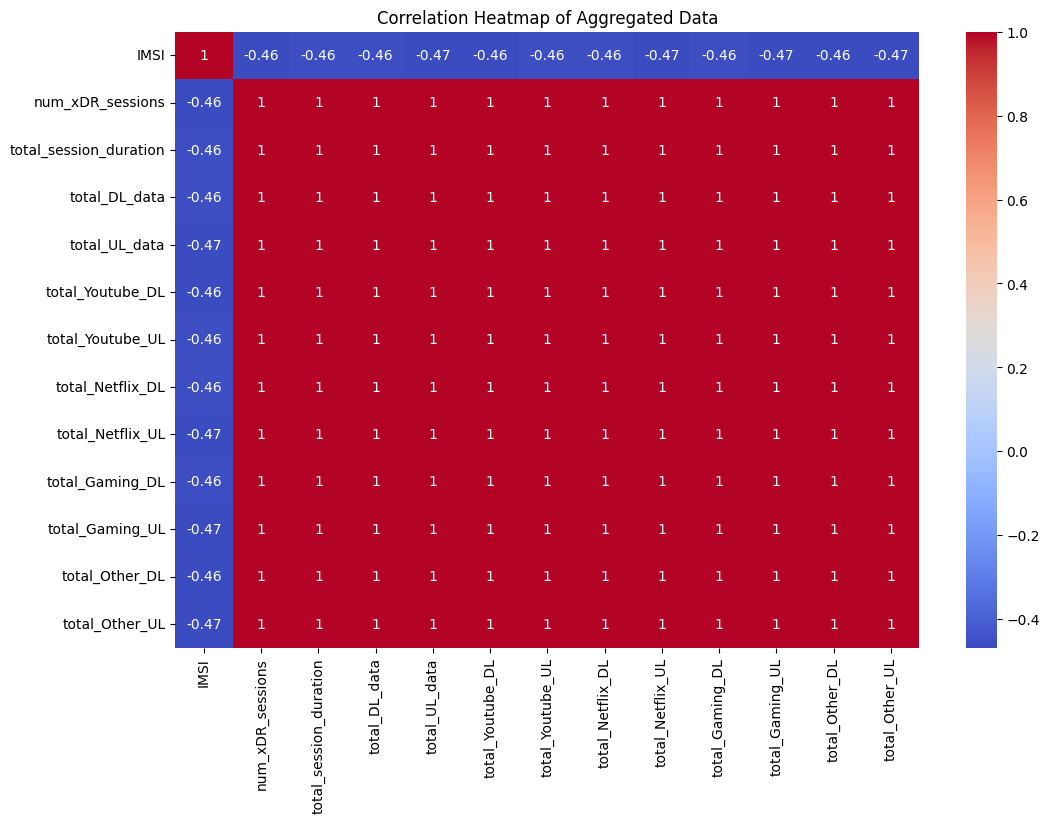

In [47]:


# Heatmap: Correlation between different features
plt.figure(figsize=(12, 8))
sns.heatmap(aggregated_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Aggregated Data')
plt.show()

1.   If you see a strong positive correlation (e.g., 0.8) between total_DL_data and total_Youtube_DL, it indicates that users who download more data overall also tend to use more data on YouTube.
2.   
A strong negative correlation (e.g., -0.7) between total_Gaming_DL and total_Other_DL (hypothetically) would indicate that users who download a lot of gaming data tend to download less data from other services.




##Recommendations to Marketing Teams

1.   Apple devices dominate the market. Create special promotions for Apple users, such as discounts on accessories or services.
2.   Create promotions and offers for Samsung and Huawei users to boost their engagement and loyalty.
3.   Sell popular handsets with accessories like cases and screen protectors to increase sales.
4.   Send personalized offers based on handset usage  For example, promote the latest models and features to younger users, while others might prioritize budget-friendly options
5.   Ask for feedback from top handset users to understand their preferences and improve your marketing strategies.







#### Explore the relationship between each application and total_data

In [48]:
# Calculate the total data (DL + UL) for each IMSI
aggregated_data['total_data'] = aggregated_data['total_DL_data'] + aggregated_data['total_UL_data']

# Calculate correlation coefficients between each application's data and total data
correlations = aggregated_data[['total_data', 'total_Youtube_DL', 'total_Youtube_UL',
                                'total_Netflix_DL', 'total_Netflix_UL',
                                'total_Gaming_DL', 'total_Gaming_UL']].corr()

print(correlations['total_data'])  # Display correlations with total_data

total_data          1.000000
total_Youtube_DL    0.999987
total_Youtube_UL    0.999999
total_Netflix_DL    0.999992
total_Netflix_UL    0.999954
total_Gaming_DL     1.000000
total_Gaming_UL     0.999933
Name: total_data, dtype: float64


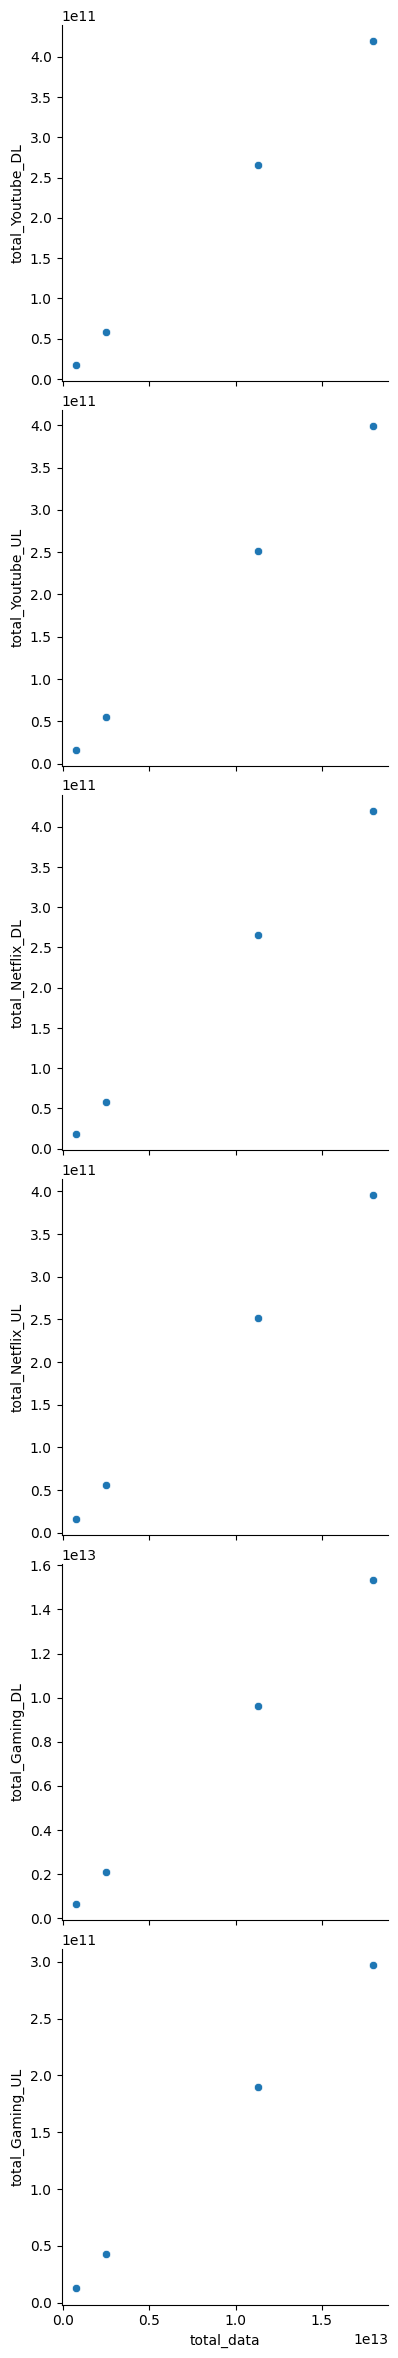

In [49]:

sns.pairplot(aggregated_data,
             x_vars=['total_data'],
             y_vars=['total_Youtube_DL', 'total_Youtube_UL', 'total_Netflix_DL', 'total_Netflix_UL', 'total_Gaming_DL', 'total_Gaming_UL'],
             height=4, aspect=1)

plt.show()

####Key Observations:


1.   Total data usage is strongly and equally influenced by the data usage of YouTube, Netflix, and Gaming.
2.  Changes in any app's usage will directly impact total data, helping network operators manage bandwidth effectively.
3.   High correlation between app usage and total data means shifts in any app's usage can impact overall network traffic.






In [50]:
 # Combine Total DL and UL data
df['Total_Data'] = df['Total_DL'] + df['Total_UL']

In [51]:
def decile_transformation(data, column):
    data['Decile_Class'] = pd.qcut(data[column], 10, labels=False)
    return data.groupby('Decile_Class').agg(Total_Data_Per_Decile=('Total_Data', 'sum')).reset_index()

# Example usage:

data_per_decile = decile_transformation(df, 'Durms')

In [52]:
data_per_decile

,Decile_Class,Total_Data_Per_Decile
0,0,3.241614e+12
1,1,3.254198e+12
2,2,3.267031e+12
3,3,3.254850e+12
4,4,3.243385e+12
5,5,3.256974e+12
6,6,3.233458e+12
7,7,3.244734e+12
8,8,3.248567e+12
9,9,3.276585e+12


#### Decile class is a method used to understand the distribution and usage patterns of data across different segments of the user base.

In [53]:
# Create decile bins based on 'Total_Data'
df['Decile'] = pd.qcut(df['Total_Data'], 10, labels=False)

# Calculate total data per decile
total_data_per_decile = df.groupby('Decile')['Total_Data'].sum().reset_index()

# Display the result
print(total_data_per_decile)

   Decile    Total_Data
0       0  7.494307e+11
1       1  1.310324e+12
2       2  1.863593e+12
3       3  2.416222e+12
4       4  2.982428e+12
5       5  3.538835e+12
6       6  4.084857e+12
7       7  4.637173e+12
8       8  5.191530e+12
9       9  5.747005e+12


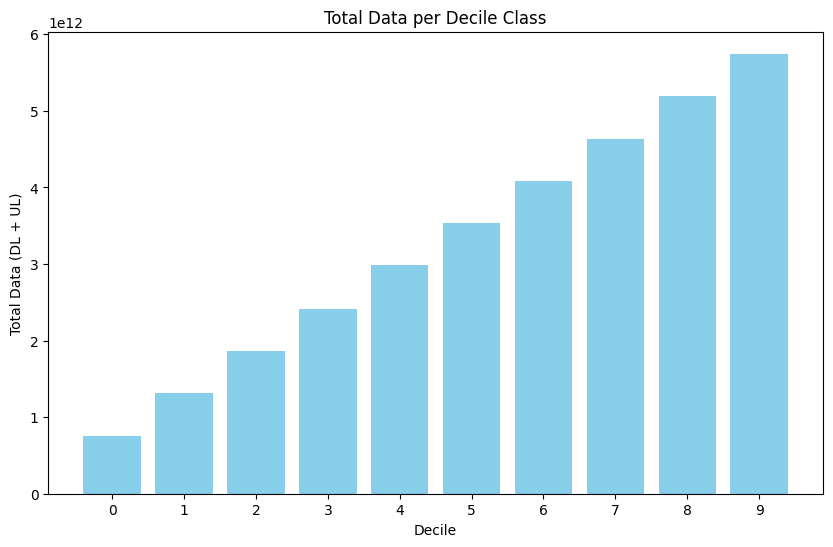

In [54]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(total_data_per_decile['Decile'], total_data_per_decile['Total_Data'], color='skyblue')
plt.xlabel('Decile')
plt.ylabel('Total Data (DL + UL)')
plt.title('Total Data per Decile Class')
plt.xticks(total_data_per_decile['Decile'])
plt.show()

####The data shows a clear progression in total data usage, with the top decile (Decile 9) accounting for the highest data consumption,

In [55]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['HandsetType', 'HandsetManufacturer']
for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

#### Dimensionality Reduction with principal component analysis (PCA)

In [60]:
# normalize data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns)

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

# Display the explained variance ratio to understand how much variance is captured by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

      BearerId     Start   StartMS       End     EndMS     Durms      IMSI  \
PC-1  0.005343 -0.109291  0.001028 -0.232645  0.001662 -0.372363 -0.008960   
PC-2 -0.003862  0.003373  0.004168  0.004026  0.003044  0.002549 -0.007187   

      MSISDNNumber      IMEI  LastLocationName  ...  Total_UL  Total_DL  \
PC-1     -0.002498 -0.013325          0.002572  ...  0.002382 -0.002953   
PC-2      0.002105 -0.005158         -0.000548  ... -0.020715 -0.499689   

      Duration_Seconds  Start_Total_MS  End_Total_MS  Calculated_Durms  \
PC-1         -0.372363       -0.109291     -0.232645         -0.372363   
PC-2          0.002549        0.003373      0.004026          0.002550   

      Calculated_Duration_Seconds  Total_Data  Decile_Class    Decile  
PC-1                    -0.372363   -0.002841     -0.366770 -0.002696  
PC-2                     0.002550   -0.500132      0.003177 -0.498857  

[2 rows x 63 columns]
Explained variance ratio: [0.12016272 0.07259896]



1.   PC-1 Influence: Strongly related to session duration, download data, and time-based metrics with significant negative loadings.
2.   PC-2 Influence: Mainly associated with total download data and overall data usage, with large negative loadings on these features.
1.   Explained Variance: PC-1 and PC-2 together explain 19.3% of the total variance, indicating that these two components capture some but not all of the data’s complexity.
2.   Two primary patterns emerge: one related to session timing and duration (PC-1), and another related to data usage (PC-2).




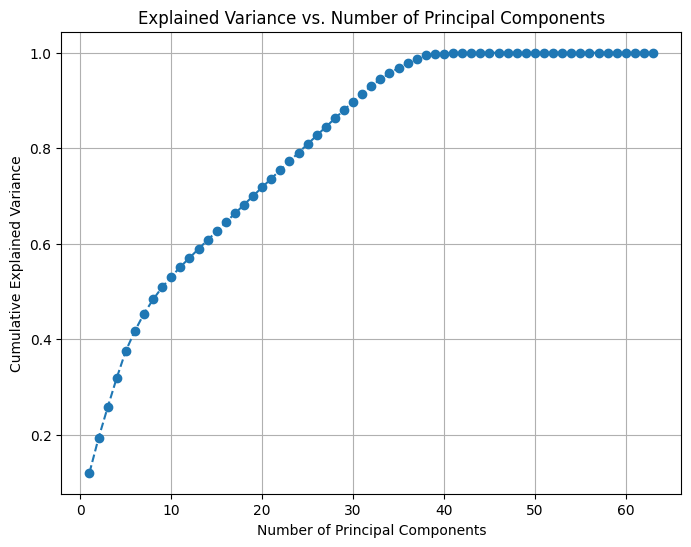

Explained variance ratio for all components: [1.20162723e-01 7.25989561e-02 6.42522058e-02 6.18418241e-02
 5.66098721e-02 4.19359120e-02 3.59874855e-02 2.96875960e-02
 2.58900595e-02 2.15797936e-02 2.08484444e-02 1.88444566e-02
 1.87477004e-02 1.86547383e-02 1.85925186e-02 1.85274939e-02
 1.84723416e-02 1.84107279e-02 1.83007676e-02 1.82285993e-02
 1.82121718e-02 1.81311363e-02 1.80685088e-02 1.80267661e-02
 1.80212978e-02 1.80035757e-02 1.78972235e-02 1.78113986e-02
 1.77341648e-02 1.74611208e-02 1.69821060e-02 1.53727707e-02
 1.46318997e-02 1.21758706e-02 1.14598433e-02 9.96347913e-03
 8.71167812e-03 7.79146278e-03 2.24192606e-03 1.44011231e-03
 6.83024748e-04 6.55649280e-04 2.03659841e-04 1.39438458e-04
 5.47555292e-06 2.31678839e-08 1.13815200e-12 3.96905652e-13
 2.36979185e-32 1.96986314e-33 1.93081974e-33 6.94562377e-34
 6.94562377e-34 6.94562377e-34 6.94562377e-34 6.94562377e-34
 6.94562377e-34 6.94562377e-34 6.94562377e-34 6.94562377e-34
 6.94562377e-34 6.94562377e-34 3.0074176

In [61]:

pca_full = PCA()
pca_full.fit(data_scaled)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Optionally, print out the explained variance ratio for all components
print(f"Explained variance ratio for all components: {pca_full.explained_variance_ratio_}")

#####The plot shows that the first 30–40 principal components capture nearly all the variance in the dataset, with the curve flattening significantly after that. This suggests that while the first few components are critical, using around 30–40 components would be necessary to capture the full complexity of the data.